In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.Thomas_Algo_ADI import create_tridiagonal,ThomasAlgorithm

In [2]:
def create_matrix(phi,x,**kwargs):
    Nx = len(x)
    dx = x[1]-x[0]
    args  = kwargs["args"]
    alpha = args[0]
    m     = args[1]  # = j for row sweep, = i for column sweep
    dt    = args[2]
    fxy   = args[3]
    sweep = kwargs["sweep"]
    
    a  = np.zeros(len(x))
    b  = np.zeros(len(x))
    c  = np.zeros(len(x))
    d  = np.zeros(len(x))
    
    for n in range(1,Nx-1,1):
        a[n] =  -alpha
        b[n] = (1+2*alpha)
        c[n] =  -alpha
        if sweep=="rows":
            d[n] = alpha*phi[n,m+1] + (1-2*alpha)*phi[n,m] + alpha*phi[n,m-1] - 0.5*dt*fxy[n,m]
        elif sweep=="columns":
            d[n] = alpha*phi[m+1,n] + (1-2*alpha)*phi[m,n] + alpha*phi[m-1,n] - 0.5*dt*fxy[m,n]
            
    return a,b,c,d

In [3]:
def L2_norm_func(sol,iter):
    tt,Nx,Ny = sol.shape
    summation = 0
    for i in range(0,Nx,1):
        for j in range(0,Ny,1):
            summation = summation + (sol[iter,i,j]-sol[iter-1,i,j])**2
    L2_norm = np.sqrt(summation/(Nx*Ny))
    return L2_norm

In [4]:
Nx    = 100
Ny    = 100
xmax  = 10
xmin  = 0
ymax  = 10
ymin  = 0
tmax  = 1
Niter = 400
tol   = 1e-4

x     = np.linspace(xmin,xmax,Nx)
y     = np.linspace(ymin,ymax,Ny)
t     = np.linspace(0,tmax,Niter)

D  = 1
dx = x[1]-x[0]
dt = t[1]-t[0]

print("dt = ",dt)
alpha = D*0.5*dt/dx**2
print("alpha = ",alpha)

xc = x[Nx//2]
yc = y[Ny//2]

dt =  0.002506265664160401
alpha =  0.12281954887218045


In [5]:
x_mesh,y_mesh = np.meshgrid(x,y)

sol        = np.zeros(((len(t),len(x),len(y))))
sol[0,Nx//2,Ny//2] = 1.0

sol_t12     = np.zeros(((len(t),len(x),len(y))))

fxy  = np.zeros((len(x),len(y)))
fxy  = np.exp(-((x_mesh-xc)**2 + (y_mesh-yc)**2))


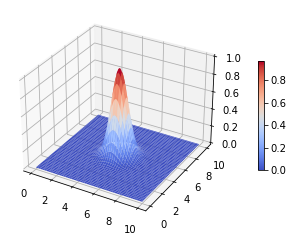

In [6]:
fig  = plt.figure()
axes = fig.add_subplot(projection='3d')
surf = axes.plot_surface(x_mesh, y_mesh,fxy,cmap='coolwarm')
fig.colorbar(surf, shrink=0.5, aspect=20,pad=0.1)
plt.show()

In [7]:
time = 1
L2_norm = 1
while(L2_norm>tol and time<Niter):    
    # sweep over rows
    for j in range(1,Ny-1,1):
        sol_t12[time,:,j] = ThomasAlgorithm(create_matrix,sol[time-1],x,args=(alpha,j,dt,fxy),sweep="rows",Left="Dirichlet",Right="Dirichlet")
    # sweep over columns
    for i in range(1,Nx-1,1):
        sol[time,i,:]     = ThomasAlgorithm(create_matrix,sol_t12[time],x,args=(alpha,i,dt,fxy),sweep="columns",Left="Dirichlet",Right="Dirichlet")
    L2_norm = L2_norm_func(sol,time)
    time = time+1
    print("ADI: ",time-1, L2_norm)


ADI:  1 0.0063772343361906
ADI:  2 0.0020004054778266418
ADI:  3 0.0009445913340344055
ADI:  4 0.0005880468507588602
ADI:  5 0.00044232533558966714
ADI:  6 0.0003735707571624988
ADI:  7 0.00033719472239295207
ADI:  8 0.00031609632711032616
ADI:  9 0.00030288393656391816
ADI:  10 0.0002940426093789431
ADI:  11 0.00028777001660683073
ADI:  12 0.00028308344301902836
ADI:  13 0.0002794186826021064
ADI:  14 0.0002764371627413318
ADI:  15 0.00027392777008852987
ADI:  16 0.0002717543784628035
ADI:  17 0.0002698265808883947
ADI:  18 0.00026808273811069485
ADI:  19 0.00026647982679427494
ADI:  20 0.00026498717570011565
ADI:  21 0.000263582495974749
ADI:  22 0.00026224930395173633
ADI:  23 0.0002609752111058378
ADI:  24 0.00025975076668791286
ADI:  25 0.00025856866013762965
ADI:  26 0.0002574231622689714
ADI:  27 0.00025630972775372585
ADI:  28 0.0002552247083567468
ADI:  29 0.00025416514336867293
ADI:  30 0.00025312860460186947
ADI:  31 0.00025211308045300276
ADI:  32 0.00025111688827512144
ADI

ADI:  257 0.00015424915974085674
ADI:  258 0.00015403794698288034
ADI:  259 0.00015382760194891141
ADI:  260 0.00015361811868457476
ADI:  261 0.00015340949129269557
ADI:  262 0.0001532017139325743
ADI:  263 0.0001529947808192946
ADI:  264 0.00015278868622303012
ADI:  265 0.00015258342446835985
ADI:  266 0.00015237898993360682
ADI:  267 0.00015217537705017054
ADI:  268 0.00015197258030187982
ADI:  269 0.0001517705942243538
ADI:  270 0.0001515694134043673
ADI:  271 0.0001513690324792367
ADI:  272 0.00015116944613619885
ADI:  273 0.00015097064911181549
ADI:  274 0.0001507726361913759
ADI:  275 0.0001505754022083102
ADI:  276 0.0001503789420436179
ADI:  277 0.00015018325062529417
ADI:  278 0.00014998832292777107
ADI:  279 0.0001497941539713696
ADI:  280 0.00014960073882174971
ADI:  281 0.00014940807258938144
ADI:  282 0.00014921615042900888
ADI:  283 0.00014902496753913615
ADI:  284 0.00014883451916151145
ADI:  285 0.0001486448005806214
ADI:  286 0.00014845580712319223
ADI:  287 0.00014826

<IPython.core.display.Javascript object>


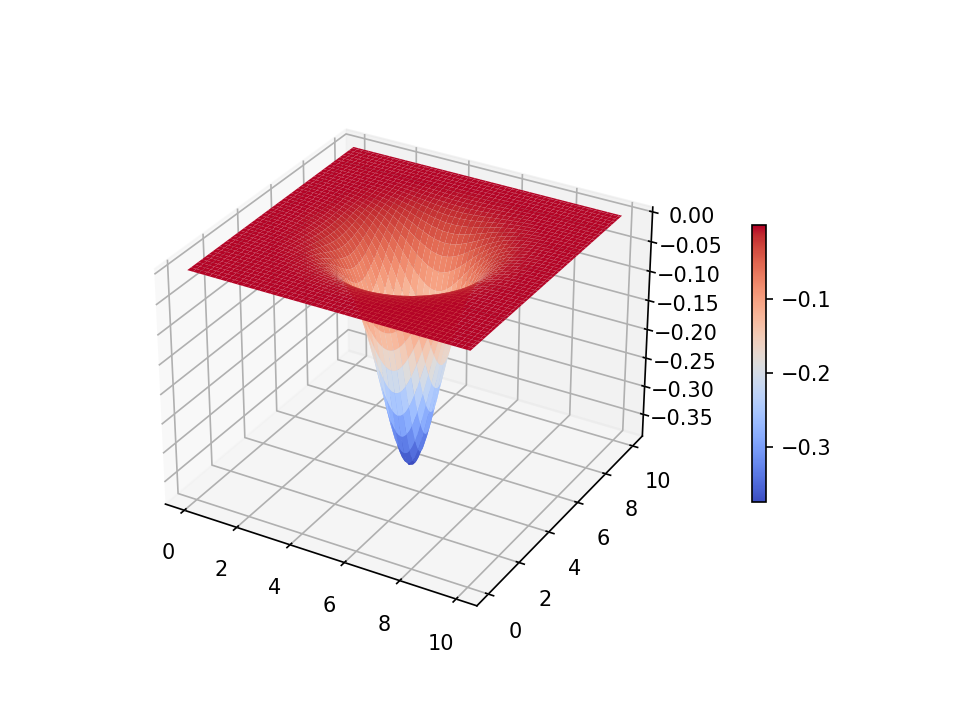

In [8]:
%matplotlib notebook
fig  = plt.figure()
axes = fig.add_subplot(projection='3d')
surf = axes.plot_surface(x_mesh, y_mesh,sol[time-1],cmap='coolwarm')
fig.colorbar(surf, shrink=0.5, aspect=20, pad=0.1)
plt.show()